<a href="https://colab.research.google.com/github/shumbul/Machine-Learning/blob/main/sexPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
R.version.string

[1] "R version 4.0.3 (2020-10-10)"

In [ ]:
install.packages("dslabs")
install.packages("caret")
install.packages("tidyverse")
library(tidyverse)
library(caret)
library(dslabs)
data(heights)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# define the outcome and predictors
y <- heights$sex
x <- heights$height

# generate training and test sets
set.seed(2, sample.kind = "Rounding") # if using R 3.5 or earlier, remove the sample.kind argument
test_index <- createDataPartition(y, times = 1, p = 0.5, list = FALSE)
test_set <- heights[test_index, ]
train_set <- heights[-test_index, ]

Warning message in set.seed(2, sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


In [ ]:
# guess the outcome
y_hat <- sample(c("Male", "Female"), length(test_index), replace = TRUE)
y_hat <- sample(c("Male", "Female"), length(test_index), replace = TRUE) %>% 
  factor(levels = levels(test_set$sex))

In [ ]:
# compute accuracy
mean(y_hat == test_set$sex)

heights %>% group_by(sex) %>% summarize(mean(height), sd(height))
y_hat <- ifelse(x > 62, "Male", "Female") %>% factor(levels = levels(test_set$sex))
mean(y == y_hat)

[1] 0.5238095

`summarise()` ungrouping output (override with `.groups` argument)



sex,mean(height),sd(height)
<fct>,<dbl>,<dbl>
Female,64.93942,3.760656
Male,69.31475,3.611024


[1] 0.7933333

[1] 0.8361905

[1] 64

[1] 0.8171429

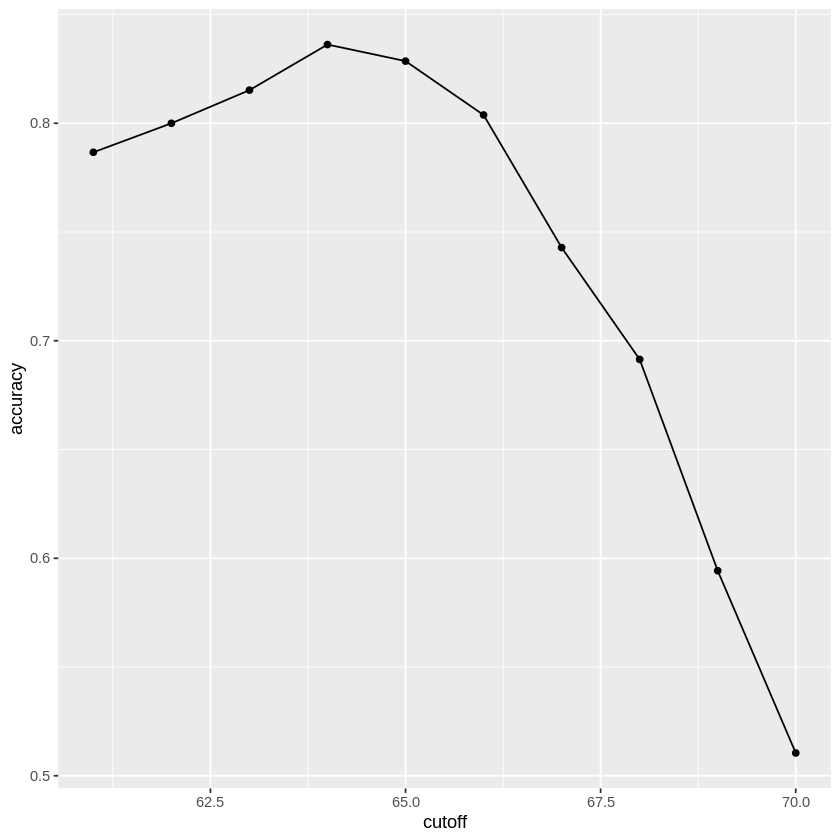

In [ ]:
# examine the accuracy of 10 cutoffs
cutoff <- seq(61, 70)
accuracy <- map_dbl(cutoff, function(x){
  y_hat <- ifelse(train_set$height > x, "Male", "Female") %>% 
    factor(levels = levels(test_set$sex))
  mean(y_hat == train_set$sex)
})
data.frame(cutoff, accuracy) %>% 
  ggplot(aes(cutoff, accuracy)) + 
  geom_point() + 
  geom_line() 
max(accuracy)

best_cutoff <- cutoff[which.max(accuracy)]
best_cutoff

y_hat <- ifelse(test_set$height > best_cutoff, "Male", "Female") %>% 
  factor(levels = levels(test_set$sex))
y_hat <- factor(y_hat)
mean(y_hat == test_set$sex)